## **Attendance and Stadium Analysis**

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#loading the data file
football_data = pd.read_csv("/content/Football_data_merged_cleaned_data (3).csv")
football_data.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name_y,team_captain,position_y
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,8d717b1017e72d89d2ee1112bb2d7466,substitutes,22,Timothy Chandler,0,Right-Back
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,d53eb3fd74523d6dd4536653c145ae96,substitutes,22,Timothy Chandler,0,Right-Back
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,3efc21c645e46b2f411bcdb1710aa444,substitutes,22,Timothy Chandler,0,Right-Back
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,cc79e78c570ce19872dfed125d324407,substitutes,22,Timothy Chandler,0,Right-Back
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,21de58902f547e231bf2604be9fa996f,substitutes,22,Timothy Chandler,0,Right-Back


In [ ]:
football_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   appearance_id                4199 non-null   object 
 1   game_id_x                    4199 non-null   int64  
 2   player_id_x                  4199 non-null   int64  
 3   competition_id_x             4199 non-null   object 
 4   yellow_cards                 4199 non-null   int64  
 5   red_cards                    4199 non-null   int64  
 6   goals                        4199 non-null   int64  
 7   assists                      4199 non-null   int64  
 8   minutes_played               4199 non-null   int64  
 9   season                       4199 non-null   int64  
 10  round                        4199 non-null   object 
 11  home_club_goals              4199 non-null   int64  
 12  away_club_goals              4199 non-null   int64  
 13  home_club_position

**Question1:**What is the distribution of attendance across all matches?

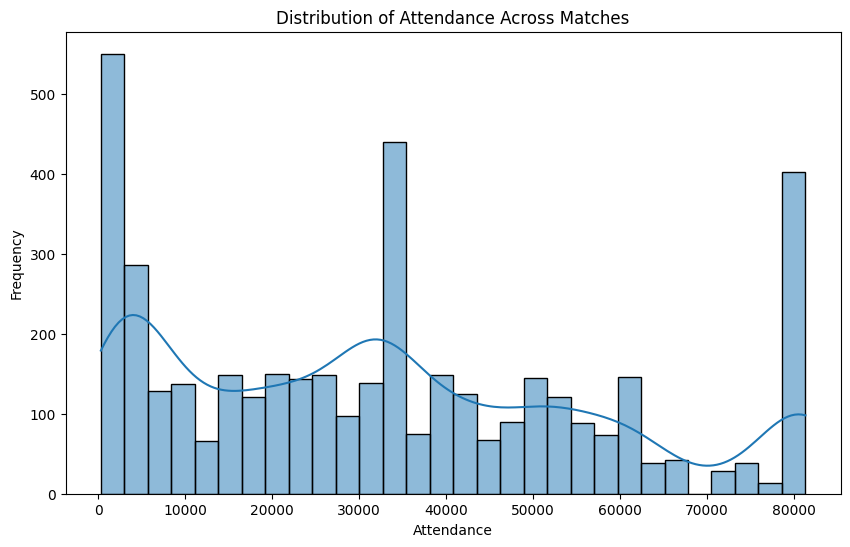

In [ ]:

# Plotting the distribution of attendance
plt.figure(figsize=(10, 6))
sns.histplot(football_data['attendance'], bins=30, kde=True)
plt.title('Distribution of Attendance Across Matches')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**Skewed Distribution: The distribution is positively skewed, meaning that most matches have lower attendance, with a few matches having significantly higher attendance.
Peak Attendance: There seems to be a peak in attendance around the 30,000 to 40,000 range, indicating that a significant number of matches fall within this attendance bracket.
Variability in Attendance: The distribution is quite spread out, suggesting a wide range of attendance figures across different matches.

**Question2:**Which stadium has the highest average attendance?

stadium
Santiago Bernabeu        76894.000000
SIGNAL IDUNA PARK        74780.654126
Allianz Arena            74666.666667
Civitas Metropolitano    61023.000000
Mercedes-Benz Arena      58605.058824
Veltins-Arena            55562.687275
Volksparkstadion         54308.000000
Olympiastadion Berlin    53537.736585
Johan Cruijff ArenA      53419.763158
Etihad Stadium           51736.769231
Name: attendance, dtype: float64


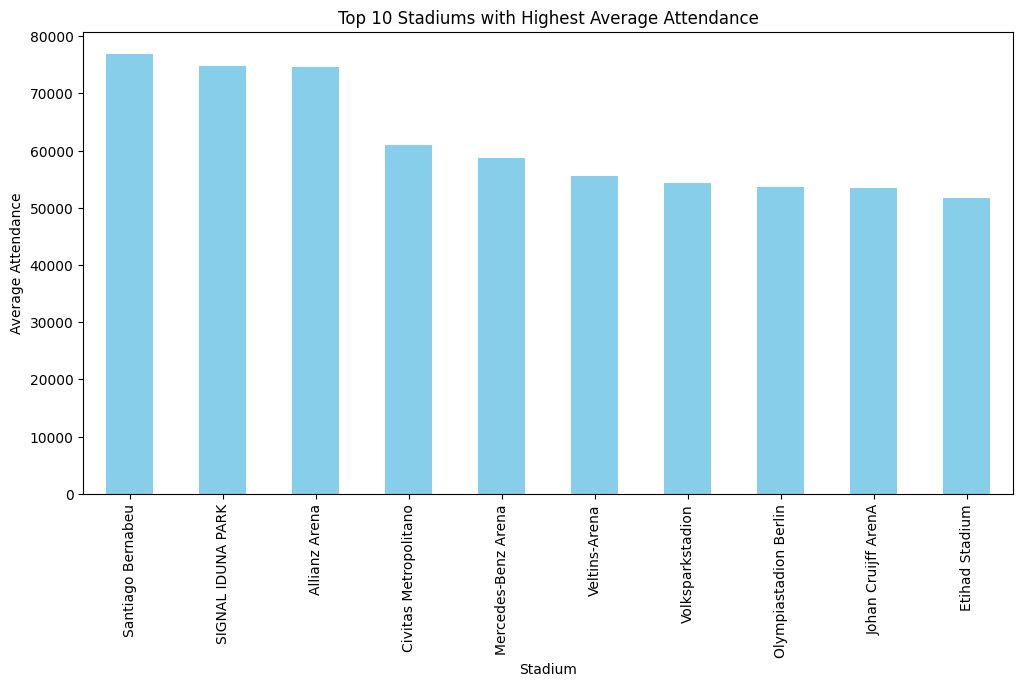

In [ ]:
# Group by stadium and calculate average attendance
average_attendance_by_stadium = football_data.groupby('stadium')['attendance'].mean().sort_values(ascending=False)

# Display top 10 stadiums with highest average attendance
print(average_attendance_by_stadium.head(10))

# Plotting the top 10 stadiums with highest average attendance
plt.figure(figsize=(12, 6))
average_attendance_by_stadium.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Stadiums with Highest Average Attendance')
plt.ylabel('Average Attendance')
plt.xlabel('Stadium')
plt.show()

**Interpretation:**Santiago Bernabeu stadium has the highest average attendance...

**Question3:** Is there any correlation between attendance and goal difference? (home team goals vs. away team goals)?

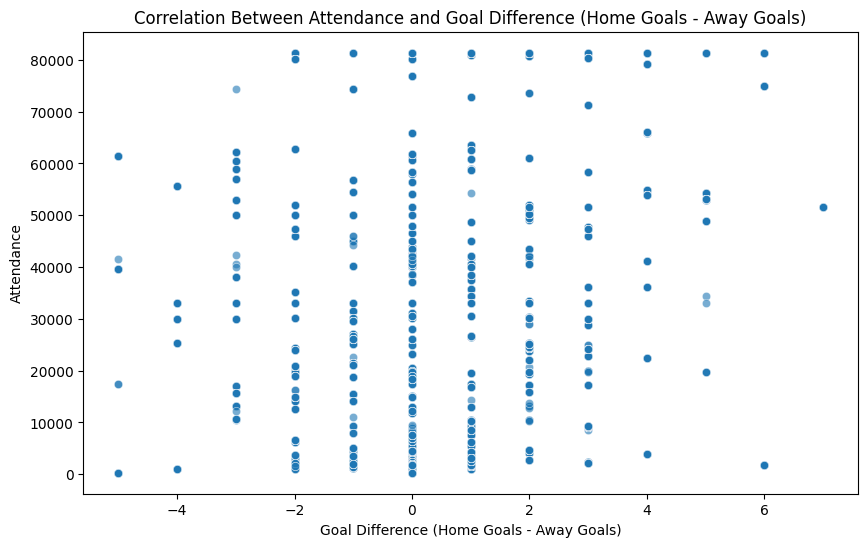

Correlation between goal difference and attendance: 0.14590062710555526


In [ ]:

# Calculate the goal difference (home goals - away goals)
football_data['goal_difference'] = football_data['home_club_goals'] - football_data['away_club_goals']

# Plotting the correlation between attendance and goal difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x=football_data['goal_difference'], y=football_data['attendance'], alpha=0.6)
plt.title('Correlation Between Attendance and Goal Difference (Home Goals - Away Goals)')
plt.xlabel('Goal Difference (Home Goals - Away Goals)')
plt.ylabel('Attendance')
plt.show()

# Calculate correlation coefficient
correlation = football_data['goal_difference'].corr(football_data['attendance'])
print(f"Correlation between goal difference and attendance: {correlation}")

**Interpretation:**Positive Correlation: There seems to be a general positive correlation between goal difference and attendance. This suggests that matches with higher goal differences tend to attract larger crowds.
Scatter: The points are scattered, indicating that other factors besides goal difference might influence attendance.
Outliers: There are a few outliers, which could be due to special matches, high-profile teams, or other unique factors.

**Question4:** How does the attendance vary by competition?*italicized text*

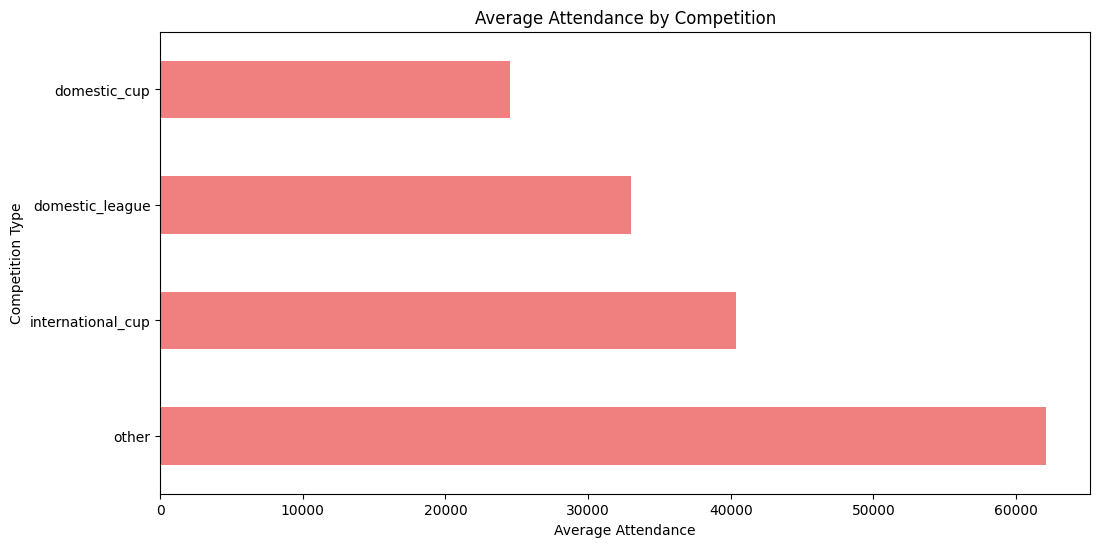

In [ ]:
# Group by competition type and calculate average attendance
attendance_by_competition = football_data.groupby('competition_type')['attendance'].mean().sort_values(ascending=False)

# Plotting the attendance by competition
plt.figure(figsize=(12, 6))
attendance_by_competition.plot(kind='barh', color='lightcoral')
plt.title('Average Attendance by Competition')
plt.xlabel('Average Attendance')
plt.ylabel('Competition Type')
plt.show()

**Interpretation:**The chart shows that "Other" competitions have the highest average attendance, followed by domestic leagues. Domestic cups have slightly lower attendance, and international cups have the lowest average attendance. This suggests that fans are most interested in friendly matches, exhibition games, or international tournaments.

# **KNN Classification:**
**classification for predicting Attendance**

In [ ]:
df = pd.DataFrame(football_data)

In [ ]:
knn_df = df[['attendance','competition_type','stadium','goals','player_name_y','season']]
knn_df

,attendance,competition_type,stadium,goals,player_name_y,season
0,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
1,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
2,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
3,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
4,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
...,...,...,...,...,...,...
4194,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4195,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4196,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4197,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020


In [ ]:
#Label Encoding
#encoding for competition_type variable
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['competition_type'])
print(purpose_encoder.classes_)
knn_df['competition_type.enc']=purpose_encoder.transform(knn_df['competition_type'])

['domestic_cup' 'domestic_league' 'international_cup' 'other']


<ipython-input-15-aa14f81622c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_df['competition_type.enc']=purpose_encoder.transform(knn_df['competition_type'])


In [ ]:
#encoding for stadium variable
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['stadium'])
print(purpose_encoder.classes_)
knn_df['stadium.enc']=purpose_encoder.transform(knn_df['stadium'])

[' Bremer Brucke' 'AFAS Stadion' 'AMEX Stadium' 'Aalborg Portland Park'
 'Allianz Arena' 'Allianz Riviera' 'Anfield'
 'Argosstadion Achter de Kazerne' 'Audi Sportpark' 'BUKO Stadion'
 'BayArena' 'Blue Water Arena' 'Bramall Lane' 'Brondby Stadium'
 'Carrow Road' 'Cegeka Arena' 'Celtic Park' 'Ceres Park'
 'Civitas Metropolitano' 'Commerzbank Arena'
 'Constant Vanden Stock Stadion' 'Craven Cottage' 'DS Arena'
 'Daknamstadion' 'Decathlon Arena-Stade Pierre-Mauroy' 'Diaz Arena'
 'Dreisamstadion' 'Edmund-Plambeck-Stadion' 'Ernst-Abbe-Sportfeld'
 'Erve Asito' 'Etihad Stadium' 'Euroborg' 'Fortuna Sittard Stadion'
 'Freethielstadion' 'Friedrich Ludwig Jahn Sportpark'
 'GP Stadion am Hardtwald' 'Ghelamco Arena' 'Groupama Stadium'
 'Guldensporenstadion' 'Heinz-von-Heiden-Arena' 'Helsingor Stadium'
 'Herfolge stadium' 'Het Kuipje' 'Home Deluxe Arena' 'JYSK Park'
 'Jahnstadion Regensburg' 'Jan-Breydel-Stadion' 'Johan Cruijff ArenA'
 'King Power Stadium' 'Koning Willem II Stadion' 'Le Canonnier'
 'L

<ipython-input-9-8e30924cf5ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_df['stadium.enc']=purpose_encoder.transform(knn_df['stadium'])


In [ ]:
#encoding for player_name_y variable
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['player_name_y'])
print(purpose_encoder.classes_)
knn_df['player_name_y.enc']=purpose_encoder.transform(knn_df['player_name_y'])

['Andrija Novakovich' 'Caleb Stanko' 'Christian Cappis'
 'Christian Pulisic' 'Desevio Payne' 'Emmanuel Sabbi' 'Erik Palmer-Brown'
 'Giovanni Reyna' 'John Anthony Brooks' 'Jonathan Amon' 'Jordan'
 'Joseph Efford' 'Josh Sargent' 'Julian Green' 'Kenny Saief'
 'Luca de la Torre' 'Lynden Gooch' 'Sergino Dest' 'Terrence Boyd'
 'Tim Ream' 'Timothy Chandler' 'Timothy Weah' 'Tyler Adams'
 'Weston McKennie']


<ipython-input-16-6233f4bd437f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_df['player_name_y.enc']=purpose_encoder.transform(knn_df['player_name_y'])


In [ ]:
#define categories(bins) and labels for attendance column
knn_df['attendance_c']=np.where(knn_df['attendance']>knn_df['attendance'].median(),'High attendance','low attendance')
#print the number of unique values
print(f"number of unique values:[log1_df['attendance_c'].unique()]")

number of unique values:[log1_df['attendance_c'].unique()]


<ipython-input-17-4586218cc1ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_df['attendance_c']=np.where(knn_df['attendance']>knn_df['attendance'].median(),'High attendance','low attendance')


In [ ]:
#encoding for attendance_c variable
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['attendance_c'])
print(purpose_encoder.classes_)
knn_df['attendance.enc']=purpose_encoder.transform(knn_df['attendance_c'])

['High attendance' 'low attendance']


<ipython-input-18-f6770840ac94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_df['attendance.enc']=purpose_encoder.transform(knn_df['attendance_c'])


In [ ]:
#removing competition_type,stadium,player_name_y,attendance columns from the data
columns_to_drop = ["competition_type","stadium","player_name_y","attendance"]
knn_df = knn_df.drop(columns_to_drop,axis=1)
knn_df

,goals,season,competition_type.enc,player_name_y.enc,attendance_c,attendance.enc
0,0,2012,1,20,High attendance,0
1,0,2012,1,20,High attendance,0
2,0,2012,1,20,High attendance,0
3,0,2012,1,20,High attendance,0
4,0,2012,1,20,High attendance,0
...,...,...,...,...,...,...
4194,1,2020,1,11,low attendance,1
4195,1,2020,1,11,low attendance,1
4196,1,2020,1,11,low attendance,1
4197,1,2020,1,11,low attendance,1


In [ ]:
#retrieving competition_type.enc and attendance.enc column from the dataset and storing into anothet dataframe
attcomp_col_df = pd.DataFrame(knn_df[['attendance.enc','competition_type.enc']])

#removing attendance.enc and column from the dataset as scaling is not required for this column
df2 = pd.DataFrame(knn_df.drop(['attendance.enc','competition_type.enc'],axis=1))

**outlier** assessment and treatment

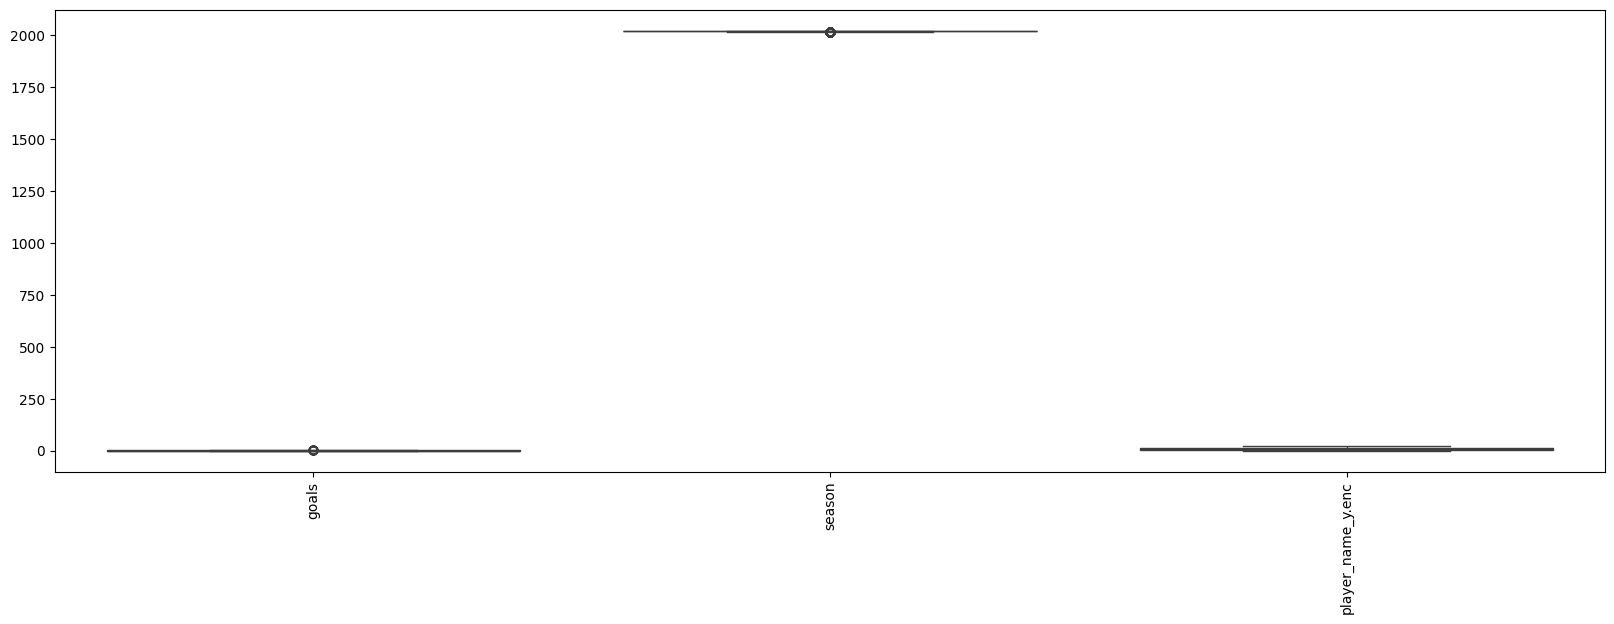

In [ ]:
#outlier assessment
sns.boxplot(data=df2)
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Outlier Treatment
def iqr_winsorization(df,thresh=1.5):
  df_numeric = df.select_dtypes(include=[np.number])
  columns_to_treat =df_numeric.columns

  for col in columns_to_treat:
    Q1 =df_numeric[col].quantile(0.25)
    Q3 =df_numeric[col].quantile(0.75)
    IQR = Q3-Q1
    #define fences
    lower_fence = Q1-thresh*IQR
    upper_fence = Q3+thresh*IQR
    #winsorize outliers
    df_numeric.loc[df_numeric[col]<lower_fence,col]=lower_fence
    df_numeric.loc[df_numeric[col]>upper_fence,col]=upper_fence
  return df_numeric
df=pd.DataFrame(df2)
#perform outlier treatment on all columns
treated_df2 = iqr_winsorization(df.copy())
print(treated_df2)

      goals  season  player_name_y.enc
0       0.0    2014               20.0
1       0.0    2014               20.0
2       0.0    2014               20.0
3       0.0    2014               20.0
4       0.0    2014               20.0
...     ...     ...                ...
4194    1.0    2020               11.0
4195    1.0    2020               11.0
4196    1.0    2020               11.0
4197    1.0    2020               11.0
4198    1.0    2020               11.0

[4199 rows x 3 columns]


<ipython-input-22-df989403a054>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_numeric.loc[df_numeric[col]<lower_fence,col]=lower_fence
<ipython-input-22-df989403a054>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_numeric.loc[df_numeric[col]<lower_fence,col]=lower_fence


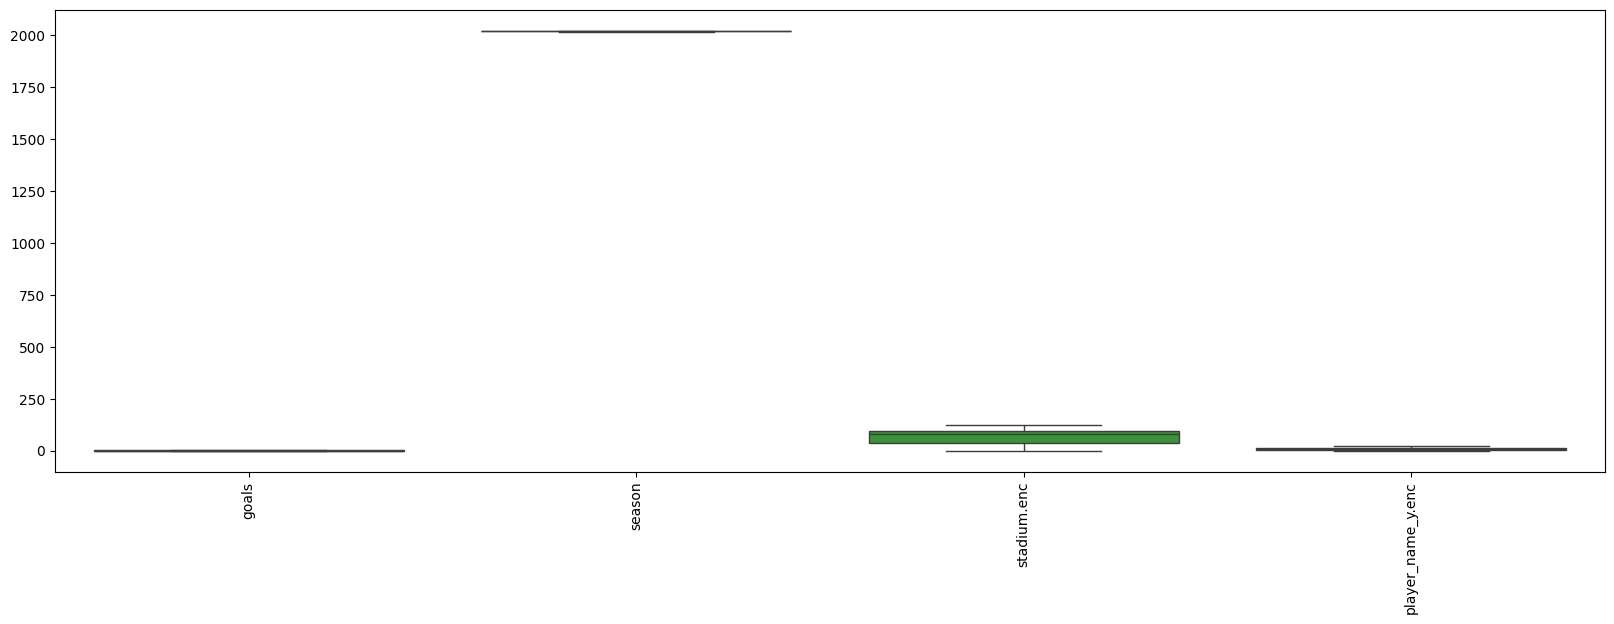

In [ ]:
sns.boxplot(data=treated_df2)
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Scaling data
cols = treated_df2.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(treated_df2)
df_scaled = pd.DataFrame(df_scaled,columns=cols)
df_scaled.head()

,goals,season,player_name_y.enc
0,-0.733861,-2.176423,1.544203
1,-0.733861,-2.176423,1.544203
2,-0.733861,-2.176423,1.544203
3,-0.733861,-2.176423,1.544203
4,-0.733861,-2.176423,1.544203


In [ ]:
#append the competition_type.enc and attendance.enc column to the scaled DataFrame
df_scaled = pd.concat([df_scaled,attcomp_col_df],axis=1)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   goals                 4199 non-null   float64
 1   season                4199 non-null   float64
 2   player_name_y.enc     4199 non-null   float64
 3   attendance.enc        4199 non-null   int64  
 4   competition_type.enc  4199 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 164.1 KB


In [ ]:
#check multicollinearity among independent variables
#selecting the cutoff value as 0.7
abs(df_scaled.corr())>0.7

,goals,season,player_name_y.enc,attendance.enc,competition_type.enc
goals,True,False,False,False,False
season,False,True,False,False,False
player_name_y.enc,False,False,True,False,False
attendance.enc,False,False,False,True,False
competition_type.enc,False,False,False,False,True


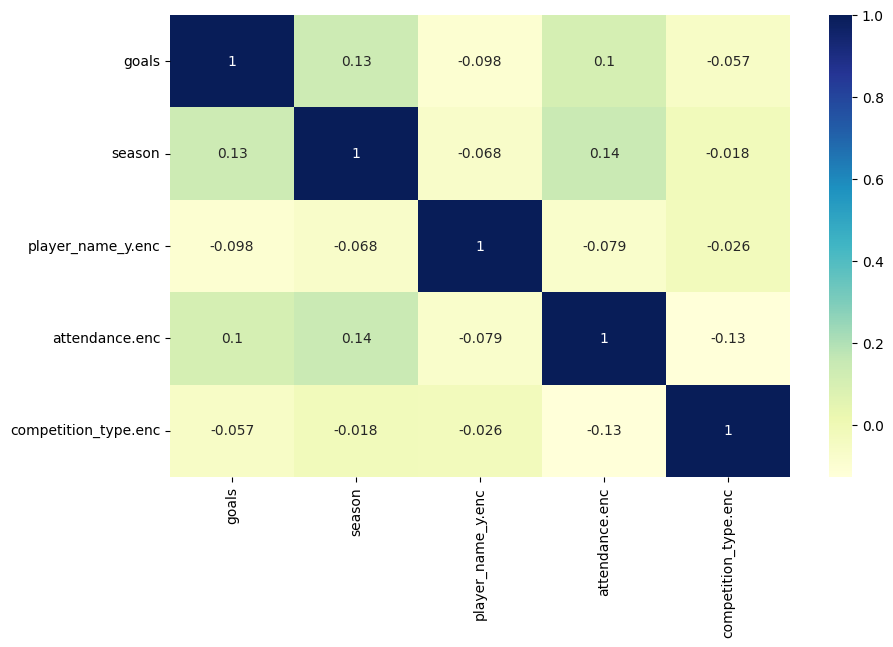

In [ ]:
#plotting heatmap
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax = sns.heatmap(df_scaled.corr(),annot=True,cmap="YlGnBu")
plt.show()

**Preparation of training and test datasets**

In [ ]:
#creating test and training datasets
attn_train,attn_test=train_test_split(df_scaled,train_size=0.8,shuffle=True,random_state=0)
print("size of trainiing dataset: ",attn_train.shape)
print("size of test dataset: ",attn_test.shape)

size of trainiing dataset:  (3359, 5)
size of test dataset:  (840, 5)


In [ ]:
x_train = attn_train.drop(columns='attendance.enc',axis=1)
y_train=attn_train['attendance.enc']
x_test=attn_test.drop(columns='attendance.enc',axis=1)
y_test=attn_test['attendance.enc']
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3359, 4), (3359,), (840, 4), (840,))

Minium error:- 0.11428571428571428 at k= 5


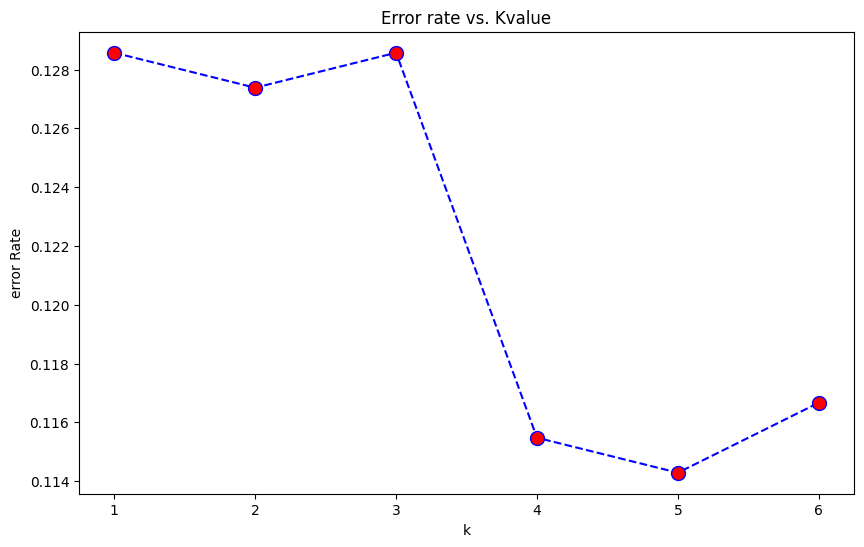

In [ ]:
#Finding optimal k value
from sklearn import neighbors
error_rate =[]
for i in range(1,7):
  clf_food = neighbors.KNeighborsClassifier(n_neighbors=i)
  clf_food.fit(x_train,y_train)
  pred_i = clf_food.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,7),error_rate,color='blue',linestyle="dashed",marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs. Kvalue')
plt.xlabel('k')
plt.ylabel('error Rate')
print("Minium error:-",min(error_rate),"at k=",error_rate.index(min(error_rate))+1)
plt.show()



In [ ]:
k=5
#Building the model
from sklearn import neighbors
#learning the classifier
clf = neighbors.KNeighborsClassifier(k)
clf.fit(x_train,y_train)

#using the trained model to predict the outcome of the x_test dataset
y_pred = clf.predict(x_test)

In [ ]:
#model properties
print(clf.classes_)
print(clf.n_neighbors)

[0 1]
5


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

[[372  40]
 [ 56 372]]
372 40 56 372


Accuracy,Recall,Precision,F1_Score

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(y_test, y_pred))#Combining the True positive and true negative cases

print('recall:', recall_score(y_test, y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(y_test, y_pred)) #Prediction for True positive cases
print('precision:', precision_score(y_test, y_pred))# Prediction fot True positive cases

accuracy: 0.8857142857142857
recall: 0.8691588785046729
f1-score: 0.8857142857142857
precision: 0.9029126213592233


**Interpretation:**Accuracy: 0.8857
This means that approximately 88.57% of the predictions made by the model are correct (i.e., the model correctly identifies both positive and negative instances).
While this is a good accuracy rate, it doesn't provide insight into how the model handles different classes, especially if the data is imbalanced.
2. Recall: 0.8692
The recall of 0.8692 indicates that the model correctly identifies 86.92% of the actual positive cases.
This means the model is quite effective at detecting positive instances, but there is still room for improvement in reducing false negatives (i.e., missing some positive cases).
3. F1-Score: 0.8857
The F1-score of 0.8857 is a harmonic mean of precision and recall. It represents a balance between the two metrics.
An F1-score of 0.8857 suggests that the model is performing well in balancing recall (finding the positive cases) and precision (not misclassifying negative cases as positive).
Since it’s close to the accuracy score, it indicates that the model is reasonably well-balanced and is not heavily favoring either false positives or false negatives.
4. Precision: 0.9029
The precision of 0.9029 tells us that when the model predicts a positive class, it is 90.29% correct.
This indicates that the model is good at avoiding false positives and is confident in its positive predictions.

In [ ]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
roc

0.9532823700208692

<Figure size 1000x800 with 0 Axes>

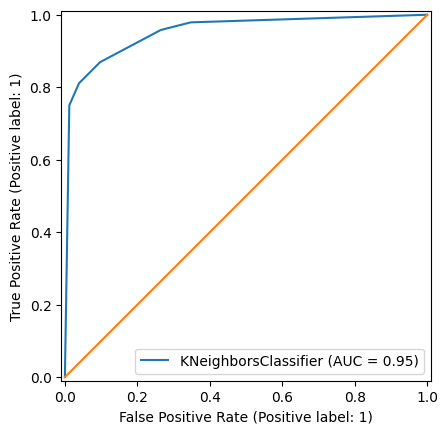

In [ ]:
# ROC curve
#from sklearn.metrics import plot_roc_curve
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))

RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.plot([0,1],[0,1])
plt.show()

**Interpretation:**The AUC (Area Under the Curve) is a measure of the model's ability to correctly classify positive and negative instances.
An AUC of 0.95 means the model has a 95% chance of correctly distinguishing between the positive and negative classes.